# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Binning for linear regression<br>



# Import modules
<hr style="border:2px solid black"> </hr>

In [1]:
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
<hr style="border:2px solid black"> </hr>

In [2]:
# Construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)

# Model -> Binning
<hr style="border:2px solid black"> </hr>


- Linear model is fast to build and relatively straightforward to interpret, but can only model linear relationships, while decision tree can build a much more complex model of the data
- One way to make linear model more powerful on continuous data is to use discretization (also known as **binning**). 
- In the example, we discretize the feature and one-hot encode the transformed data.



In [3]:
# Transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins = 10, encode = 'onehot')
X_binned = enc.fit_transform(X)

# Plotting
<hr style="border:2px solid black"> </hr>

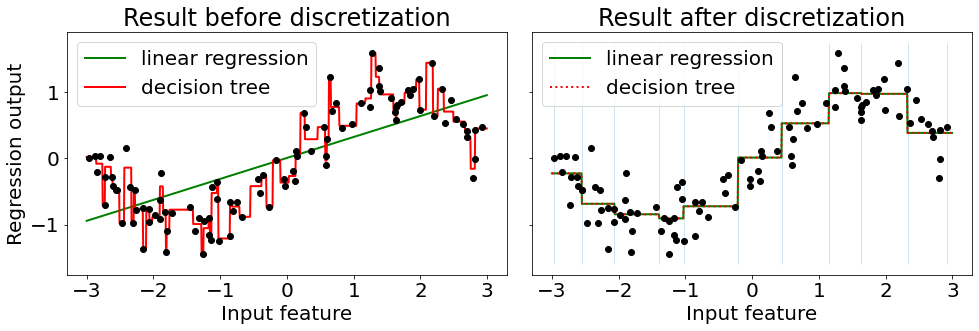

In [4]:
rcParams['figure.figsize'] = 14, 5
rcParams['font.size'] = 20

# Predict with original dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color='green',
         label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color='red',
         label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# Predict with transformed dataset
line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)
ax2.plot(line, reg.predict(line_binned), linewidth=2, color='green',
         linestyle='-', label='linear regression')
reg = DecisionTreeRegressor(min_samples_split=3,
                            random_state=0).fit(X_binned, y)
ax2.plot(line, reg.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()

# Conclusion
<hr style="border:2px solid black"> </hr>


- Essentially we have forced the model to fit the data in 10 different bins.
- Each bin does not see what in the other one.
- The graph shows that a liner regression model can be **forced** to leanr non-linear relationship via binning.



# References
<hr style="border:2px solid black"> </hr>


- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization.html#sphx-glr-auto-examples-preprocessing-plot-discretization-py<br>

